미래에셋 자산운용  
AI 혁신본부 AI 혁신팀 사전 과제 제출용

1. 데이터 불러오기
2. 데이터 살펴보기
3. 전처리 파이프라인 만들기
4. 모델 학습과 선택
5. 제출


본 파일은 google colab에서 작성되었습니다.

기본 설정

In [0]:
import numpy as np 
import os  
import matplotlib
import matplotlib.pyplot as plt
import sklearn 
import pandas as pd
import tensorflow as tf 

from IPython.display import display

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

matplotlib.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mirae.zip to mirae.zip


In [3]:
!unzip mirae.zip

Archive:  mirae.zip
  inflating: mirae/test_data.csv     
  inflating: mirae/train_data.csv    
  inflating: mirae/train_target.csv  


In [4]:
os.listdir()

['.config', 'mirae.zip', 'mirae', 'sample_data']

# 1. 데이터 불러오기

In [0]:
DATA = pd.read_csv('mirae//train_data.csv', engine='python')
TARGET1 = pd.read_csv('mirae//train_target.csv', engine='python')
SUBMISSION = pd.read_csv('mirae//test_data.csv', engine='python')

In [6]:
display(DATA.head())
display(TARGET1.head())
display(SUBMISSION.head())

,td,code,F001,F002,F003,F004,F005,F006,F007,F008,...,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046
0,T001,A005,7.267364,0.004896,0.945559,-0.828748,0.641026,-0.038719,0.015282,-1.015634,...,-1.567398,0.007646,0.002793,1.0,0.004724,-1.041667,13.357401,0.793424,11.347518,0.544470
1,T001,A006,-7.477904,-0.000128,1.089255,0.042335,7.640449,0.038965,0.016616,-0.631765,...,-1.033058,-0.001463,-0.002713,2.0,-0.004431,2.040816,-14.464286,0.546866,-4.960317,3.914780
2,T001,A007,7.622525,0.001413,1.260723,0.001667,13.735577,0.025740,0.012530,6.140861,...,7.648485,0.003168,-0.000951,6.0,-0.004544,0.000000,13.052749,0.523903,-1.228115,9.910044
3,T001,A011,51.693204,0.000000,6.967351,0.268144,-11.543311,0.143675,0.033834,0.401105,...,1.358087,0.037001,-0.004078,2.0,0.012924,-7.142857,156.242771,1.050259,137.679277,-2.979930
4,T001,A012,-7.707446,-0.000763,1.201887,0.285988,21.070234,-0.006894,0.017134,0.497051,...,0.835655,-0.059726,-0.000538,5.0,-0.000045,0.000000,-17.351598,0.865144,-17.539863,12.087614


,td,code,target
0,T001,A005,-0.041401
1,T001,A006,-0.010438
2,T001,A007,-0.042630
3,T001,A011,0.109743
4,T001,A012,0.058011


,td,code,F001,F002,F003,F004,F005,F006,F007,F008,...,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046
0,T275,A005,15.834757,-0.004040,1.175874,0.000243,-4.702970,-0.039944,0.027050,-4.023189,...,-10.672854,0.015422,-0.009397,1.0,-0.012452,0.000000,40.510949,0.994388,6.353591,-2.035956
1,T275,A006,8.992218,-0.000675,0.947045,-0.030466,-0.709220,0.027105,0.027855,1.479513,...,4.089219,0.002015,-0.000447,2.0,0.000019,1.470588,19.402985,0.980344,19.148936,-0.434839
2,T275,A007,4.184298,0.002019,0.722963,0.102586,-13.975904,0.037740,0.020610,-4.317447,...,-9.044586,0.014919,0.002052,6.0,0.004690,-1.000000,6.886228,1.166253,-12.926829,-6.614890
3,T275,A008,-17.642056,-0.003666,1.671914,-0.015421,-2.547771,0.058734,0.022762,-6.463780,...,-14.365672,-0.133613,-0.001011,4.0,-0.001194,-3.174603,-42.336683,1.084645,-35.077793,-1.165099
4,T275,A012,38.383748,0.001836,1.166738,0.000000,9.698997,0.054793,0.034665,-2.378564,...,-8.123249,0.028009,0.007012,5.0,0.009573,0.000000,105.771644,0.821431,95.005945,2.817153


체크 사항  
1. 훈련 데이터의 특성의 경우 td, code와 F0__라는 식의 특성들이 있다.
2. 타겟 파일의 경우 td, code와 타겟값이 있다.
3. td의 경우 날짜정보, code의 경우 종목정보를 나타낸다.

# 2. 데이터 살펴보기

regression을 위해 TARGET1 데이터를 카피하자.

In [7]:
data = DATA.copy()
data['target'] = TARGET1["target"].copy()
submission = SUBMISSION.copy()

data.drop(['td','code'], axis=1, inplace=True)
submission.drop(['td','code'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83564 entries, 0 to 83563
Data columns (total 47 columns):
F001      80147 non-null float64
F002      72494 non-null float64
F003      82138 non-null float64
F004      83448 non-null float64
F005      83448 non-null float64
F006      69456 non-null float64
F007      82518 non-null float64
F008      82504 non-null float64
F009      71432 non-null float64
F010      70884 non-null float64
F011      82867 non-null float64
F012      80464 non-null float64
F013      83445 non-null float64
F014      70398 non-null float64
F015      83383 non-null float64
F016      83383 non-null float64
F017      71637 non-null float64
F018      82717 non-null float64
F019      70839 non-null float64
F020      82908 non-null float64
F021      80017 non-null float64
F022      83410 non-null float64
F023      70145 non-null float64
F024      80812 non-null float64
F025      83392 non-null float64
F026      71295 non-null float64
F027      81626 non-null float64


체크 사항
1. 주어진 데이터는 83564 객체가 있다.
2. 특성의 경우 48개가 있다.
3. 거의 모든 특성들에 결측치가 있다.

## 1. 결측치 살펴보기

In [8]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62109 entries, 0 to 83563
Data columns (total 47 columns):
F001      62109 non-null float64
F002      62109 non-null float64
F003      62109 non-null float64
F004      62109 non-null float64
F005      62109 non-null float64
F006      62109 non-null float64
F007      62109 non-null float64
F008      62109 non-null float64
F009      62109 non-null float64
F010      62109 non-null float64
F011      62109 non-null float64
F012      62109 non-null float64
F013      62109 non-null float64
F014      62109 non-null float64
F015      62109 non-null float64
F016      62109 non-null float64
F017      62109 non-null float64
F018      62109 non-null float64
F019      62109 non-null float64
F020      62109 non-null float64
F021      62109 non-null float64
F022      62109 non-null float64
F023      62109 non-null float64
F024      62109 non-null float64
F025      62109 non-null float64
F026      62109 non-null float64
F027      62109 non-null float64


결측치가 있는 객체를 모두 제거할 경우, 약 20000개의 데이터가 손실된다. 약 20000개의 데이터의 손실은 전체 훈련 데이터의 1/4 정도의 손실이다.

In [9]:
data.isnull().sum()

F001       3417
F002      11070
F003       1426
F004        116
F005        116
F006      14108
F007       1046
F008       1060
F009      12132
F010      12680
F011        697
F012       3100
F013        119
F014      13166
F015        181
F016        181
F017      11927
F018        847
F019      12725
F020        656
F021       3547
F022        154
F023      13419
F024       2752
F025        172
F026      12269
F027       1938
F028      11059
F029        143
F030        116
F031        116
F032        156
F033      12497
F034       3295
F035        996
F036      12479
F037        116
F038       3226
F039      12506
F040        181
F041      13515
F042      15680
F043        116
F044          5
F045        116
F046        462
target        0
dtype: int64

제일 결측치가 많은 특성은 F042이다. 약 만오천개의 결측치가 있는데 전체 데이터의 1/5 정도이고 이 정도면 특성을 삭제하거나, 객체를 제거하는 것보다 결측치를 채우는 것이 더 낫다고 판단된다.

## 2. 데이터 시각화
### 1. 수치형 변수의 도수분포표

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


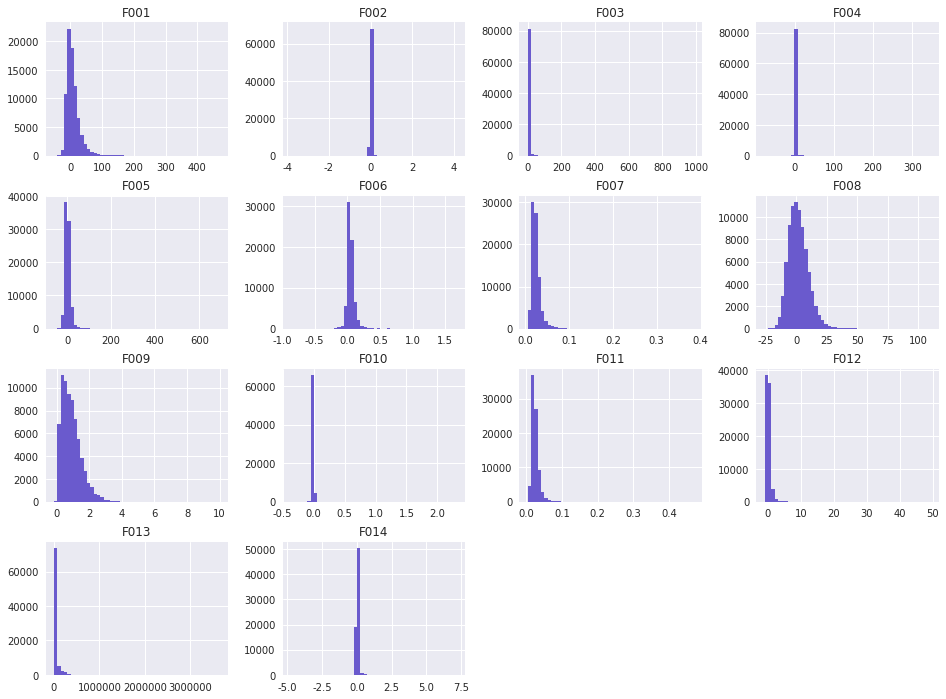

,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,F011,F012,F013,F014
count,80147.000000,72494.000000,82138.000000,83448.000000,83448.000000,69456.000000,82518.000000,82504.000000,71432.000000,70884.000000,82867.000000,80464.000000,8.344500e+04,70398.000000
mean,7.894370,0.000915,3.212757,0.202291,2.075079,0.052969,0.024497,1.753955,0.909854,-0.000027,0.024370,0.228121,4.032338e+04,0.046942
std,22.101300,0.039230,17.267118,2.020238,14.543002,0.069505,0.011561,8.342232,0.601707,0.016406,0.012083,0.769835,1.418674e+05,0.132913
min,-52.092279,-3.832419,0.169382,-76.840000,-59.385189,-0.866186,0.005690,-26.092628,-0.165837,-0.367137,0.003439,-0.958573,2.664000e+03,-4.746435
25%,-6.103297,-0.001195,0.919447,-0.020000,-5.553225,0.020651,0.017816,-4.073285,0.440529,-0.001739,0.017460,-0.129312,6.503220e+03,0.014973
50%,3.184114,0.000000,1.551248,0.000000,0.440529,0.042782,0.022341,0.917061,0.800000,0.000000,0.022058,0.062735,1.240721e+04,0.037237
75%,16.197738,0.000400,3.090994,0.059686,7.606289,0.073355,0.028253,6.597034,1.234568,0.001397,0.028192,0.359261,3.039216e+04,0.067633
max,470.723992,4.133958,983.606913,345.800000,691.925065,1.670955,0.383658,109.968661,10.000000,2.307626,0.468572,49.238095,3.640578e+06,7.161950


In [10]:
data.iloc[:, :14].hist(bins=50, figsize=(16,12), color='slateblue')
plt.show()
display(data.iloc[:, :14].describe())

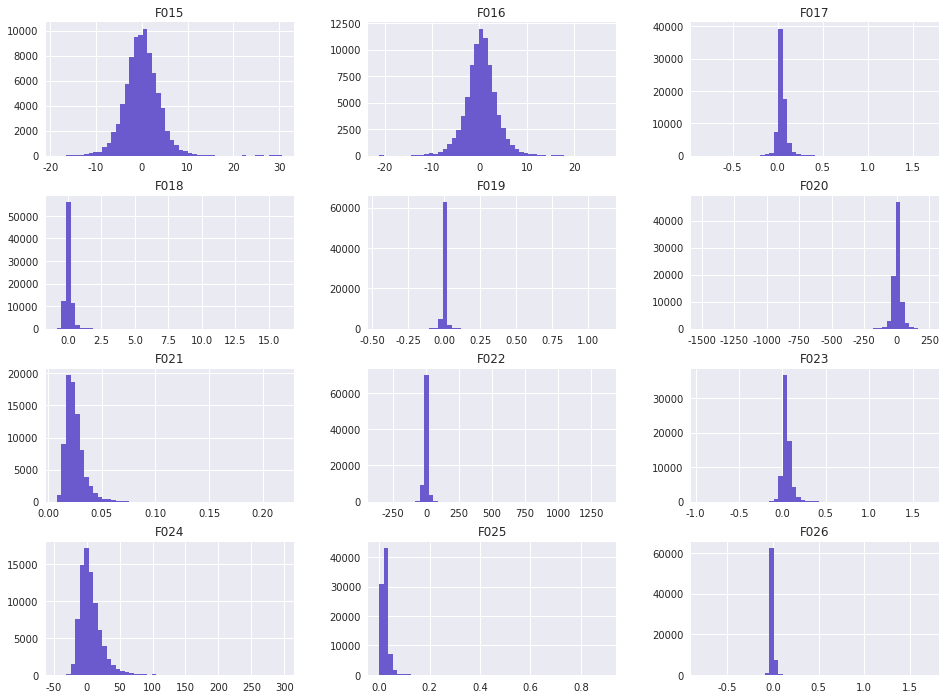

,F015,F016,F017,F018,F019,F020,F021,F022,F023,F024,F025,F026
count,83383.000000,83383.000000,71637.000000,82717.000000,70839.000000,82908.000000,80017.000000,83410.000000,70145.000000,80812.000000,83392.000000,71295.000000
mean,-0.030110,0.321484,0.049640,0.056761,-0.001016,2.296417,0.024672,0.259129,0.051908,5.707921,0.023405,0.001681
std,3.777982,3.304472,0.056603,0.299828,0.019365,34.702022,0.009251,17.116941,0.065942,17.248487,0.013741,0.026073
min,-18.528906,-21.148030,-0.843800,-0.807115,-0.451408,-1499.547445,0.008150,-353.201172,-0.929443,-44.998364,0.000000,-0.781277
25%,-2.272332,-1.505424,0.023111,-0.084112,-0.003457,-10.841668,0.018753,-5.360640,0.021709,-5.530151,0.015391,-0.001900
50%,-0.061928,0.362394,0.042602,0.017639,-0.000189,2.167657,0.023005,0.017797,0.042704,2.503850,0.020692,0.000985
75%,2.164566,2.176982,0.068093,0.140187,0.001347,15.990866,0.028243,5.762944,0.071301,13.121715,0.027837,0.004464
max,30.691952,26.500946,1.662323,16.010309,1.116911,234.261384,0.218381,1352.978276,1.669305,297.126526,0.895348,1.693431


In [11]:
data.iloc[:, 14:26].hist(bins=50, figsize=(16,12), color='slateblue')
plt.show()
display(data.iloc[:, 14:26].describe())

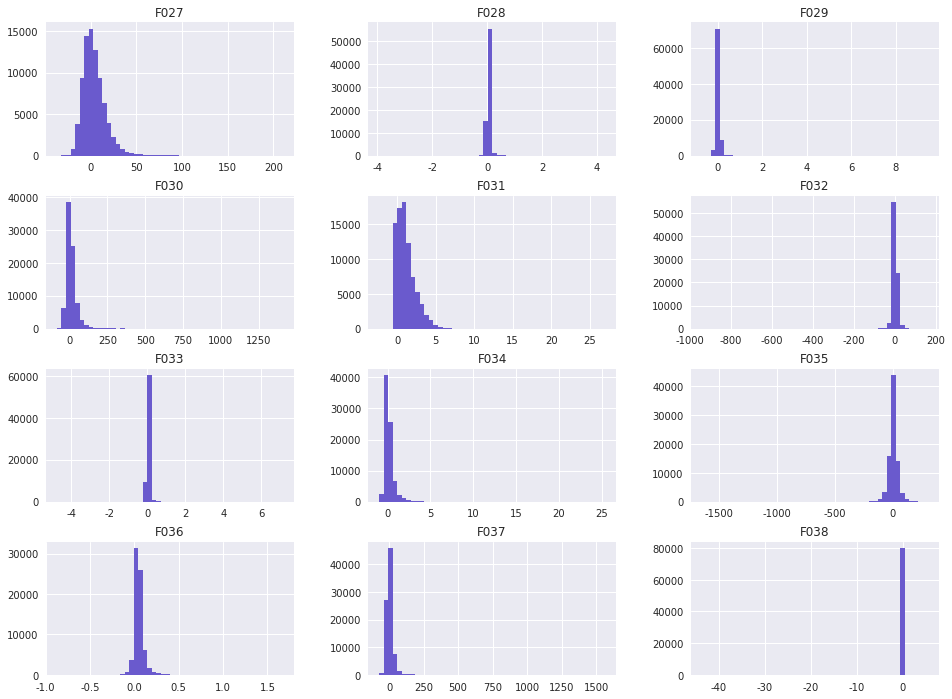

,F027,F028,F029,F030,F031,F032,F033,F034,F035,F036,F037,F038
count,81626.000000,72505.000000,83421.000000,83448.000000,83448.000000,83408.000000,71067.000000,80269.000000,82568.000000,71085.000000,83448.000000,80338.000000
mean,3.629038,0.043050,0.008528,11.835276,1.193595,0.605239,0.045751,0.219851,3.422978,0.050507,6.097276,0.003239
std,12.878910,0.073059,0.096566,45.999533,1.256675,13.266900,0.112927,0.709107,44.191253,0.060596,29.899738,0.328621
min,-37.000024,-3.923003,-0.720634,-84.214294,-2.331606,-942.709728,-4.734186,-0.958573,-1650.772459,-0.871131,-70.219780,-43.672986
25%,-4.945935,0.017796,-0.038655,-10.224090,0.282359,-3.901836,0.016176,-0.130435,-13.953701,0.022688,-8.556635,-0.006791
50%,1.569848,0.037109,0.000000,2.730415,0.838926,0.473877,0.037271,0.061333,3.166523,0.042707,1.724138,0.002463
75%,9.911651,0.061685,0.046034,22.244340,1.754386,5.170179,0.065200,0.355680,21.759228,0.069268,14.653135,0.014523
max,209.954156,4.280389,9.423453,1407.389163,26.966292,157.884076,7.102284,25.357143,297.243414,1.668721,1563.043478,5.317080


In [12]:
data.iloc[:, 26:38].hist(bins=50, figsize=(16,12), color='slateblue')
plt.show()
display(data.iloc[:, 26:38].describe())

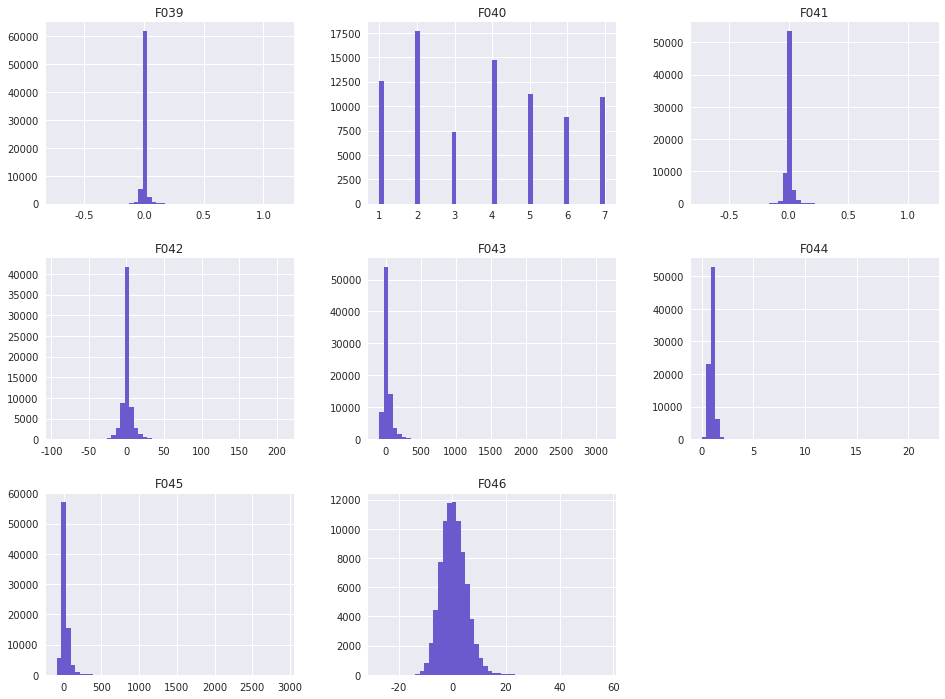

,F039,F040,F041,F042,F043,F044,F045,F046
count,71058.000000,83383.000000,70049.000000,67884.000000,83448.000000,83559.000000,83448.000000,83102.000000
mean,0.001637,3.776357,0.003051,0.678024,23.730528,1.000124,17.703937,0.495890
std,0.025129,1.994943,0.034708,8.502843,76.855077,0.269099,61.836535,4.649171
min,-0.727923,1.000000,-0.727923,-92.500000,-92.017722,0.013118,-89.843290,-27.129617
25%,-0.002727,2.000000,-0.005400,-1.198204,-12.293946,0.864735,-11.295780,-2.745036
50%,0.000000,4.000000,0.000000,0.000000,5.000000,0.985998,4.213260,0.234027
75%,0.002716,5.000000,0.007320,2.083333,36.567964,1.102857,29.559748,3.478132
max,1.160028,7.000000,1.160612,207.692308,3125.524476,21.820324,2900.000000,56.845020


In [13]:
data.iloc[:, 38:-1].hist(bins=50, figsize=(16,12), color='slateblue')
plt.show()
display(data.iloc[:, 38:-1].describe()) ## target 제외

체크 사항
1. log화가 필요한 특성들이 보인다.  
    F003, F004, F005, F007, F009, F010,   
    F011, F012, F013, F018,     
    F024, F025, F029, F030,   
    F031, F032(y축 대칭 후 로그화), F034, F035(y축 대칭 후 로그화)
    __추가 작성__
2. F040의 경우 명목형 변수로 사용할 수도 있을 것 같다.

### 2. 타겟값

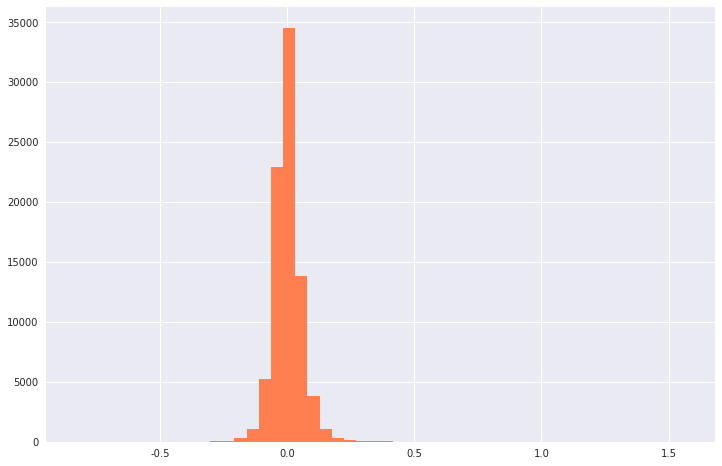

count    83564.000000
mean         0.001237
std          0.057097
min         -0.830631
25%         -0.029167
50%         -0.001265
75%          0.028465
max          1.564103
Name: target, dtype: float64

In [14]:
data["target"].hist(bins=50, figsize=(12,8), color='coral')
plt.show()
display(data["target"].describe())

체크 사항
1. 숫자가 가운데 몰려있다. 결과가 원하는 만큼나오지 않는다면, 표준화를 시도해 볼 수 있을 것 같다.

### 3. 특성과 타겟값
#### 1. 상관관계

In [15]:
corr_matrix = data.corr()
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
F039      0.025969
F019      0.021637
F041      0.021358
F010      0.018671
F026      0.016986
F038      0.013306
F015      0.013185
F009      0.012360
F001      0.009856
F008      0.009509
F044      0.009109
F034      0.008375
F040      0.008366
F002      0.007820
F042      0.006793
F014      0.006315
F024      0.005780
F036      0.005072
F023      0.004245
F004      0.003881
F027      0.003807
F022      0.003471
F006      0.003437
F031      0.002687
F025      0.002096
F043      0.000968
F028      0.000897
F033      0.000698
F003     -0.000105
F017     -0.001528
F013     -0.001551
F037     -0.002069
F012     -0.002316
F045     -0.004358
F030     -0.005216
F011     -0.007163
F018     -0.007895
F007     -0.008095
F046     -0.008342
F020     -0.009010
F035     -0.011169
F005     -0.014383
F016     -0.016782
F029     -0.018774
F032     -0.019323
F021     -0.020610
Name: target, dtype: float64

특성과 타겟의 상관관계가 매우 낮은 걸 볼 수 있다. 그림을 통해 살펴보자.

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


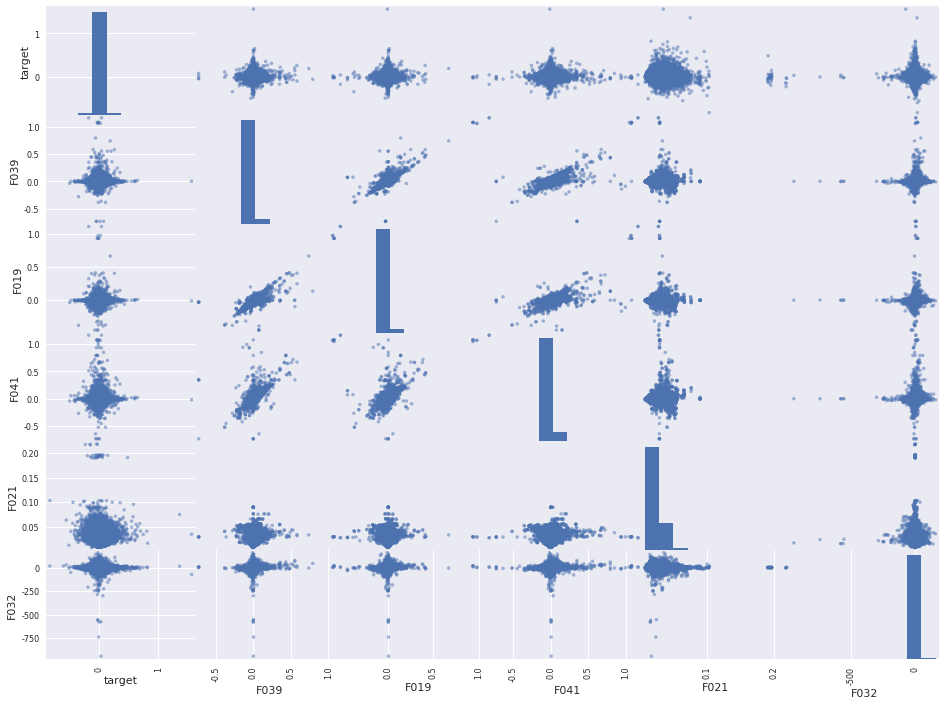

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["target","F039","F019", "F041", "F021", "F032"]
scatter_matrix(data[attributes], figsize=(16, 12))
plt.show()

특성들끼리 상관관계가 있는 모습이 보인다. 전처리 단계에서 PCA를 통해 이러한 상관관계를 줄이도록 해보겠다.

### 4. 명목형 변수와 타겟값

F042의 명목형 변수화하는 것도 효과를 볼 것 같다.

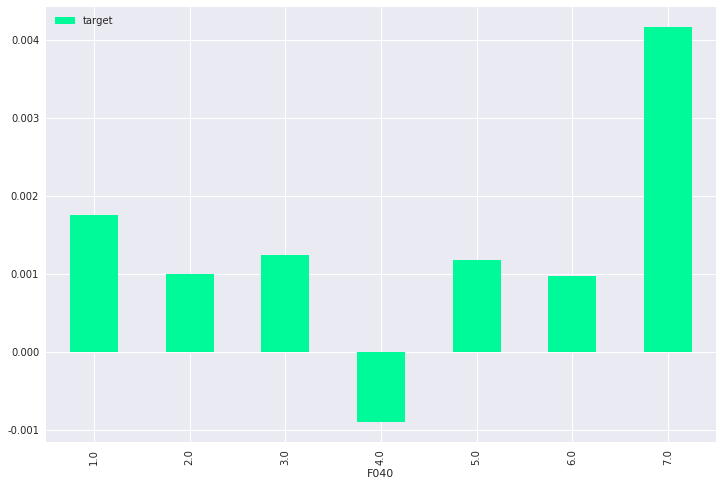

In [17]:
data_f040 = data[['F040', 'target']].copy()
data_f040.groupby('F040').mean().plot.bar(figsize=(12,8), color='mediumspringgreen')
plt.show()

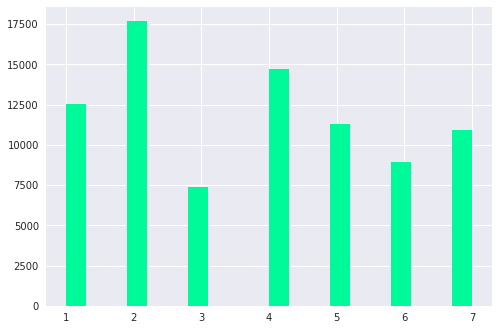

In [18]:
data["F040"].hist(bins=20, color='mediumspringgreen')

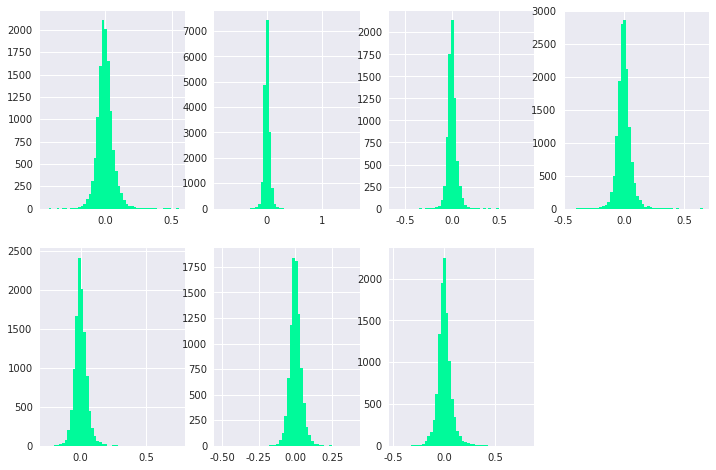

In [19]:
for i in range(1,8):
    plt.subplot(2,4,i)
    data_f040[data_f040['F040'] == i]['target'].hist(bins=50,figsize=(12,8), color='mediumspringgreen')
plt.show()

F040의 경우 구간에 따라 타겟의 평균값이 패턴을 보이는 경우가 있으니 F040을 명목화 하는 것이 좋을 것 같다.

In [20]:
dir()

['DATA',
 'In',
 'Out',
 'SUBMISSION',
 'TARGET1',
 '_',
 '_15',
 '_18',
 '_4',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_exit_code',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 '_sh',
 'attributes',
 'corr_matrix',
 'data',
 'data_f040',
 'display',
 'exit',
 'files',
 'get_ipython',
 'i',
 'matplotlib',
 'np',
 'os',
 'pd',
 'plt',
 'quit',
 'reset_graph',
 'scatter_matrix',
 'sklearn',
 'submission',
 'tf',
 'uploaded']

In [0]:
del DATA, TARGET1
del attributes, corr_matrix
del data_f040, i
del scatter_matrix

## 3. 전처리와 파이프라인 만들기
### 1. 수치형 변수 전처리

In [22]:
num_attribute = list(data.columns[:-8]) + list(data.columns[-7:-1])
cat_attribute = ["F040"]
print(len(num_attribute + cat_attribute))

data_num = data[num_attribute].copy()

46


#### 1. 결측치 처리

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
tmp = imputer.fit_transform(data_num)

data_num_tr = pd.DataFrame(tmp, columns=num_attribute)
data_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83564 entries, 0 to 83563
Data columns (total 45 columns):
F001    83564 non-null float64
F002    83564 non-null float64
F003    83564 non-null float64
F004    83564 non-null float64
F005    83564 non-null float64
F006    83564 non-null float64
F007    83564 non-null float64
F008    83564 non-null float64
F009    83564 non-null float64
F010    83564 non-null float64
F011    83564 non-null float64
F012    83564 non-null float64
F013    83564 non-null float64
F014    83564 non-null float64
F015    83564 non-null float64
F016    83564 non-null float64
F017    83564 non-null float64
F018    83564 non-null float64
F019    83564 non-null float64
F020    83564 non-null float64
F021    83564 non-null float64
F022    83564 non-null float64
F023    83564 non-null float64
F024    83564 non-null float64
F025    83564 non-null float64
F026    83564 non-null float64
F027    83564 non-null float64
F028    83564 non-null float64
F029    83564 non-null 

#### 2. min-max scaling

In [24]:
data_min_max = (data_num_tr - data_num_tr.min())/(data_num_tr.max() - data_num_tr.min()) * 5

data_min_max.describe()

,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,...,F036,F037,F038,F039,F041,F042,F043,F044,F045,F046
count,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,...,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000
mean,0.573688,2.405946,0.015473,0.911441,0.409021,1.811399,0.248783,1.023310,0.529072,0.686248,...,1.814354,0.233634,4.457661,1.932147,1.935294,1.551972,0.179871,0.226303,0.179854,1.644872
std,0.207001,0.022934,0.087037,0.023884,0.096717,0.124878,0.151976,0.304611,0.273620,0.028246,...,0.110023,0.091470,0.032886,0.061369,0.084132,0.127646,0.119348,0.061698,0.103339,0.276054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.443583,2.404859,0.003857,0.908812,0.358358,1.756407,0.161163,0.811825,0.328724,0.684003,...,1.765700,0.188819,4.456685,1.922791,1.916978,1.540679,0.123940,0.195261,0.131404,1.452955
50%,0.537192,2.405371,0.007191,0.909048,0.398264,1.811399,0.221914,0.997505,0.529072,0.686248,...,1.814354,0.220321,4.457645,1.928137,1.931933,1.540679,0.150863,0.223064,0.157389,1.631165
75%,0.645788,2.405946,0.015473,0.909765,0.445727,1.836917,0.297134,1.198250,0.646903,0.688022,...,1.839483,0.259753,4.458733,1.932295,1.940720,1.555550,0.199684,0.249855,0.199611,1.821094
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


#### 3. log화

log화가 필요한 데이터들:  
['F001', 'F003', 'F004', 'F005',  
 'F007', 'F009', 'F010', 'F011',  
 'F012', 'F013', 'F018', 'F024',  
 'F021', 'F025', 'F029', 'F030',  
 'F031', 'F034', 'F020'(x=2.5 대칭 후 로그화), 'F032'(x=2.5 대칭 후 로그화),  
 'F035'(y축 대칭 후 로그화)]  

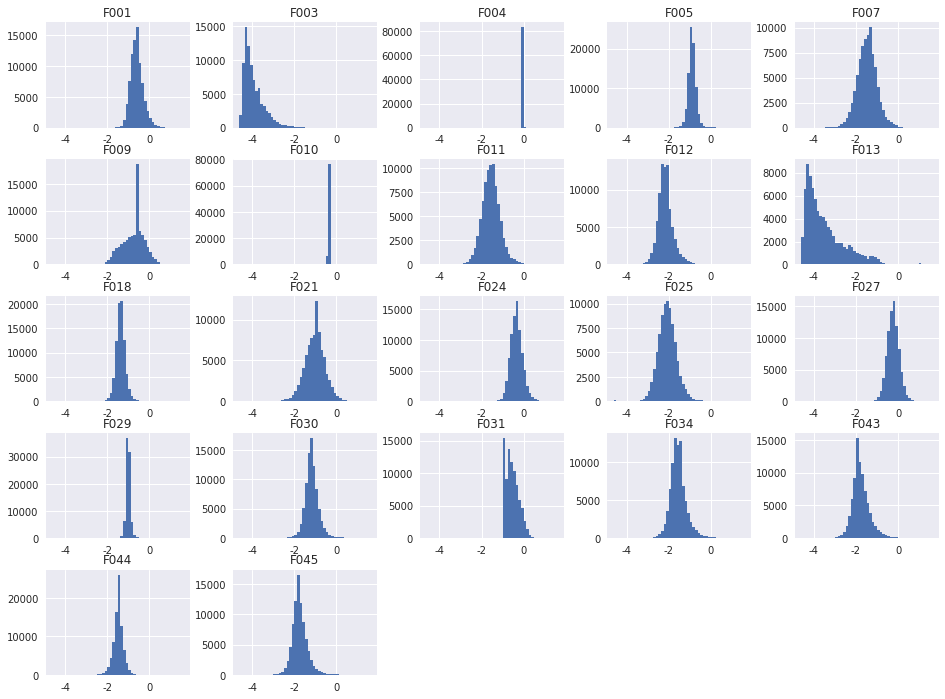

In [25]:
log_data1 = ['F001', 'F003', 'F004', 'F005',
             'F007', 'F009', 'F010', 'F011',
             'F012', 'F013', 'F018', 'F024',
             'F021', 'F025', 'F027', 'F029', 
             'F030', 'F031', 'F034', 'F043',
             'F044', 'F045']
log_data2 = ['F020', 'F032', 'F035'] # y축 대칭 후 로그화

data_log1 = data_min_max[log_data1].copy()
for i in log_data1:
    data_log1.loc[:, i] = data_log1[i] - data_log1[i].min() + 0.01
data_log1 = np.log(data_log1)

data_log1.hist(bins=50, figsize=(16,12))
plt.show()

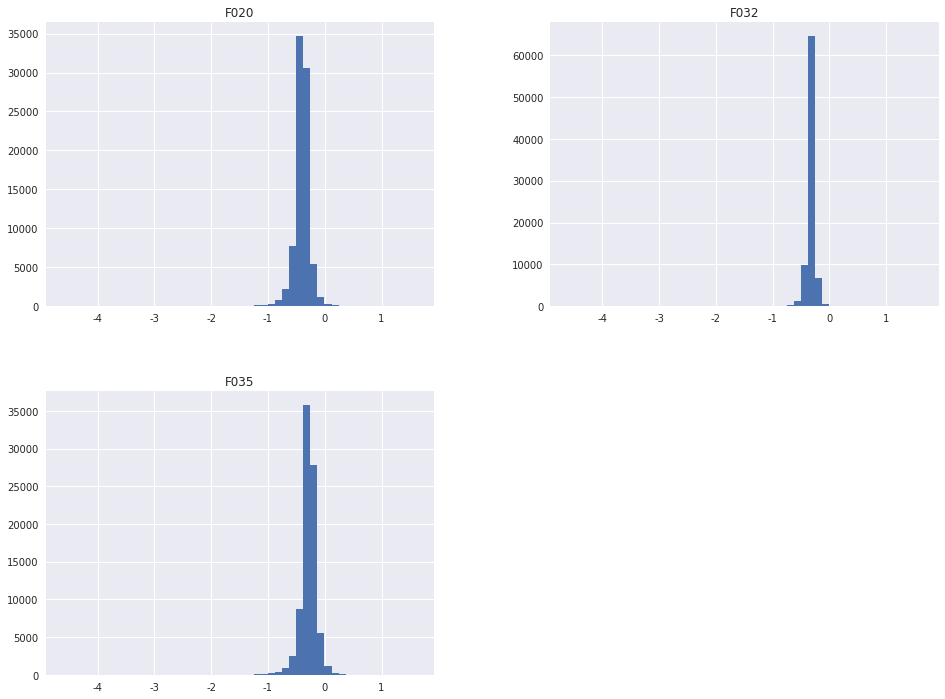

In [26]:
data_log2 = 5 - data_min_max[log_data2]

for i in log_data2:
    data_log2.loc[:, i] = data_log2[i] - data_log2[i].min() + 0.01
data_log2 = np.log(data_log2)

data_log2.hist(bins=50, figsize=(16,12))
plt.show()

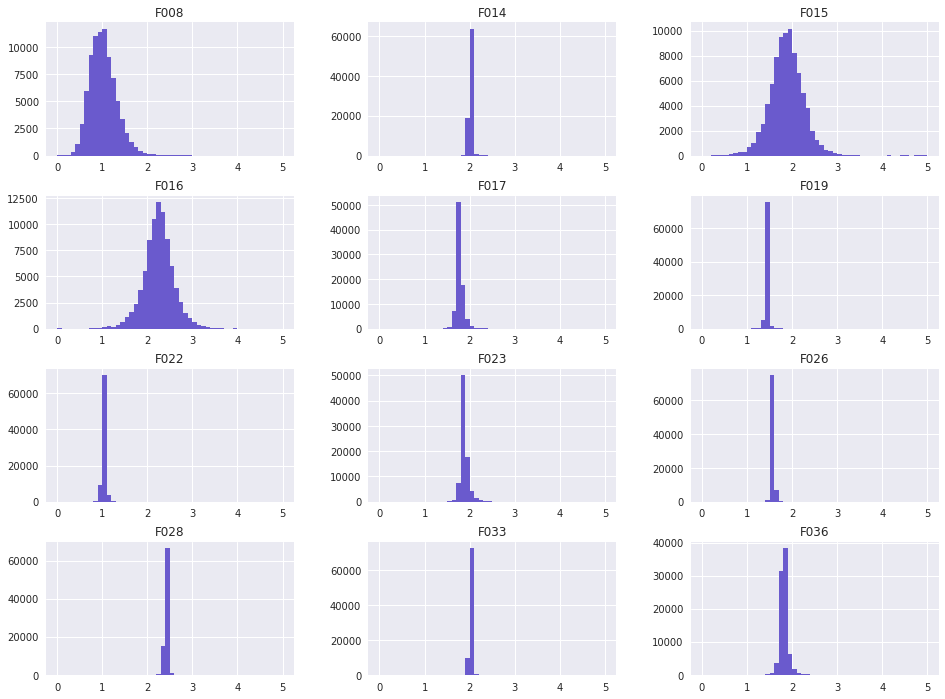

,F002,F006,F008,F014,F015,F016,F017,F019,F022,F023,F026,F028,F033,F036
count,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000
mean,2.405946,1.811399,1.023310,2.012606,1.879162,2.252883,1.782515,1.435907,1.035824,1.888124,1.581920,2.417325,2.019157,1.814354
std,0.022934,0.124878,0.304611,0.051222,0.383363,0.346376,0.104560,0.056843,0.050115,0.116241,0.048659,0.041478,0.043992,0.110023
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.404859,1.756407,0.811825,2.001069,1.651488,2.061359,1.735186,1.431026,1.019426,1.837138,1.576359,2.403849,2.008365,1.765700
50%,2.405371,1.811399,0.997505,2.012606,1.876769,2.256397,1.782515,1.436001,1.035152,1.888124,1.581920,2.417325,2.019157,1.814354
75%,2.405946,1.836917,1.198250,2.018349,2.101738,2.446947,1.808787,1.441451,1.051899,1.912379,1.585675,2.426002,2.024795,1.839483
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [27]:
log_data = log_data1 + log_data2
data_with_log = data_min_max.drop(log_data, axis=1).join([data_log1, data_log2]).copy()

data_with_log.iloc[:, 2:14].hist(bins=50, figsize=(16,12), color='slateblue')
plt.show()
display(data_with_log.iloc[:, :14].describe())

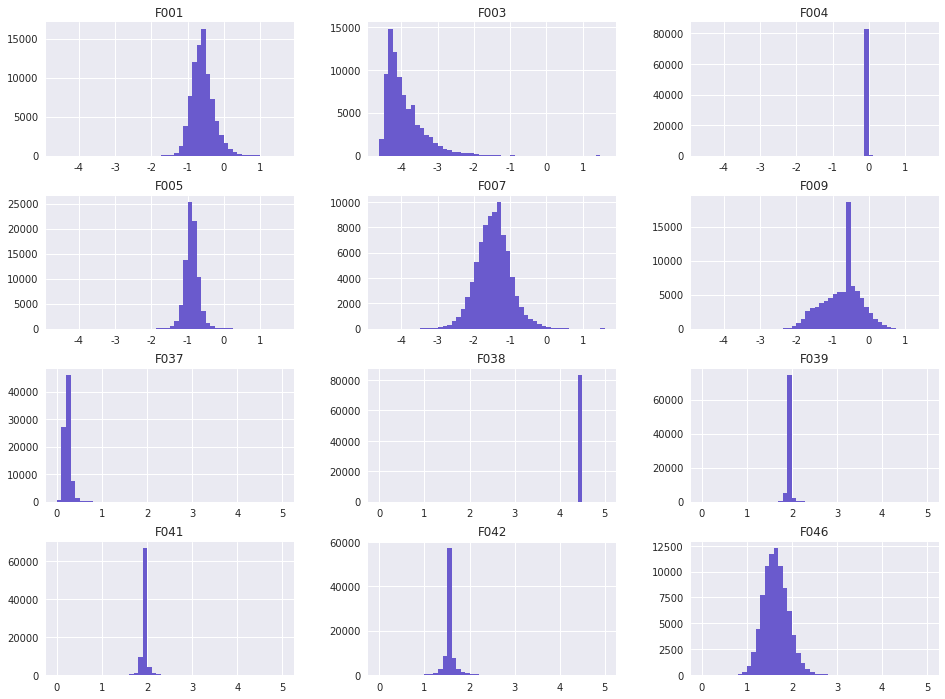

,F037,F038,F039,F041,F042,F046,F001,F003,F004,F005,F007,F009
count,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000
mean,0.233634,4.457661,1.932147,1.935294,1.551972,1.644872,-0.587333,-3.912455,-0.082060,-0.890335,-1.467937,-0.743837
std,0.091470,0.032886,0.061369,0.084132,0.127646,0.276054,0.301959,0.513645,0.024472,0.198035,0.472991,0.514882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170
25%,0.188819,4.456685,1.922791,1.916978,1.540679,1.452955,-0.790576,-4.278992,-0.084674,-0.998700,-1.765140,-1.082571
50%,0.220321,4.457645,1.928137,1.931933,1.540679,1.631165,-0.602955,-4.063360,-0.084417,-0.895842,-1.461389,-0.617907
75%,0.259753,4.458733,1.932295,1.940720,1.555550,1.821094,-0.421917,-3.670130,-0.083637,-0.785862,-1.180470,-0.420218
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.611436,1.611436,1.611436,1.611436,1.611436,1.611436


In [28]:
data_with_log.iloc[:, 14:26].hist(bins=50, figsize=(16,12), color='slateblue')
plt.show()
display(data_with_log.iloc[:, 14:26].describe())

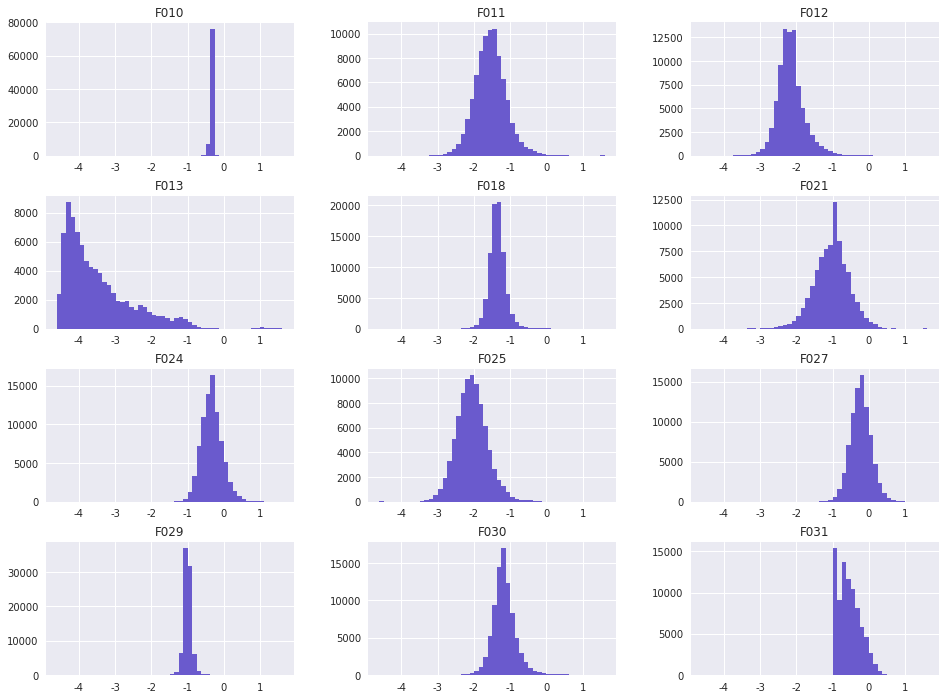

,F010,F011,F012,F013,F018,F024,F021,F025,F027,F029,F030,F031
count,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000
mean,-0.362598,-1.547093,-2.141317,-3.469648,-1.353440,-0.331716,-1.023378,-2.062349,-0.225858,-1.002216,-1.165625,-0.540208
std,0.033952,0.430626,0.385203,0.929579,0.240877,0.294585,0.480987,0.438822,0.289370,0.111099,0.332665,0.300500
min,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170
25%,-0.365280,-1.825461,-2.370647,-4.180956,-1.490445,-0.525878,-1.322425,-2.343196,-0.411940,-1.060798,-1.354444,-0.784874
50%,-0.362049,-1.555406,-2.177448,-3.753931,-1.363451,-0.338717,-0.987581,-2.074187,-0.225546,-1.006221,-1.198698,-0.595429
75%,-0.359505,-1.289865,-1.968943,-3.030408,-1.233830,-0.159577,-0.734398,-1.799798,-0.046323,-0.947163,-1.003130,-0.346782
max,1.611436,1.611436,1.611436,1.611436,1.611436,1.611436,1.611436,1.611436,1.611436,1.611436,1.611436,1.611436


In [29]:
data_with_log.iloc[:, 26:38].hist(bins=50, figsize=(16,12), color='slateblue')
plt.show()
display(data_with_log.iloc[:, 26:38].describe())

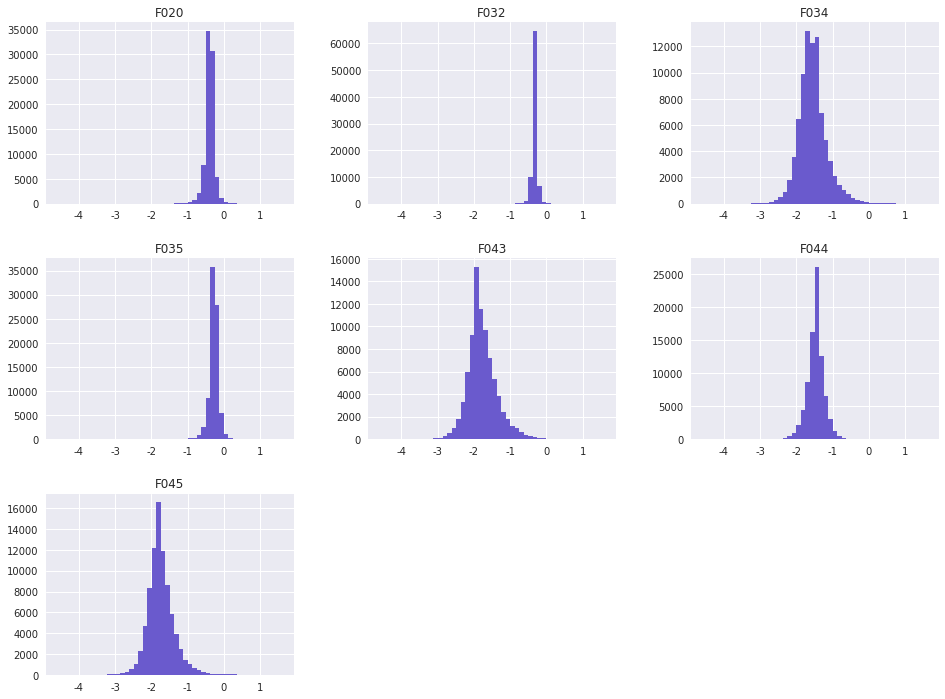

,F034,F043,F044,F045,F020,F032,F035
count,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000
mean,-1.543354,-1.765177,-1.469718,-1.741553,-0.396947,-0.325332,-0.279147
std,0.398216,0.421648,0.233943,0.371913,0.143701,0.079948,0.146042
min,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170,-4.605170
25%,-1.777863,-2.010363,-1.583473,-1.956131,-0.446525,-0.351203,-0.331525
50%,-1.575132,-1.827200,-1.456440,-1.787432,-0.387213,-0.321504,-0.268987
75%,-1.360789,-1.562152,-1.347631,-1.562500,-0.333576,-0.294448,-0.213160
max,1.611436,1.611436,1.611436,1.611436,1.611436,1.611436,1.611436


In [30]:
data_with_log.iloc[:, 38:].hist(bins=50, figsize=(16,12), color='slateblue')
plt.show()
display(data_with_log.iloc[:, 38:].describe())

#### 4. min-max scaling again

In [31]:
data_min_max = (data_with_log - data_with_log.min())/(data_with_log.max() - data_with_log.min())

data_min_max.describe()

,F002,F006,F008,F014,F015,F016,F017,F019,F022,F023,...,F029,F030,F031,F034,F043,F044,F045,F020,F032,F035
count,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,...,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000,83564.000000
mean,0.481189,0.362280,0.204662,0.402521,0.375832,0.450577,0.356503,0.287181,0.207165,0.377625,...,0.579569,0.553283,0.653888,0.492522,0.456840,0.504367,0.460640,0.676933,0.688452,0.695882
std,0.004587,0.024976,0.060922,0.010244,0.076673,0.069275,0.020912,0.011369,0.010023,0.023248,...,0.017871,0.053512,0.048338,0.064057,0.067826,0.037632,0.059826,0.023116,0.012860,0.023492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480972,0.351281,0.162365,0.400214,0.330298,0.412272,0.347037,0.286205,0.203885,0.367428,...,0.570146,0.522910,0.614531,0.454799,0.417399,0.486069,0.426123,0.668957,0.684291,0.687456
50%,0.481074,0.362280,0.199501,0.402521,0.375354,0.451279,0.356503,0.287200,0.207030,0.377625,...,0.578925,0.547963,0.645005,0.487410,0.446863,0.506503,0.453260,0.678498,0.689068,0.697516
75%,0.481189,0.367383,0.239650,0.403670,0.420348,0.489389,0.361757,0.288290,0.210380,0.382476,...,0.588425,0.579422,0.685002,0.521889,0.489498,0.524006,0.489442,0.687126,0.693420,0.706496
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 5. PCA

In [32]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_min_max)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1

pca = PCA(n_components=d)

pca.fit_transform(data_min_max), d

(array([[-0.20914768,  0.16701906, -0.05166635, ...,  0.00408564,
          0.04972963, -0.0028345 ],
        [-0.21769561,  0.11172307,  0.0033572 , ..., -0.02129003,
          0.01302892,  0.05385534],
        [-0.14051617,  0.14841811, -0.1145431 , ...,  0.00968251,
          0.04966606, -0.01794363],
        ...,
        [ 0.17170475, -0.00535618,  0.02028352, ..., -0.0420539 ,
          0.033925  , -0.02464877],
        [ 0.03155285, -0.03805991,  0.07415447, ..., -0.03618097,
          0.01153683,  0.03055506],
        [ 0.1285898 , -0.12559262,  0.05237085, ..., -0.03383164,
          0.01681581,  0.00986898]]), 15)

분산을 95% 설명가능한 변수의 개수는 15개다. 15가지 특성을 이용하겠다. 

In [33]:
col = []
for i in range(d):
    col.append('pca%s' %i)
    
XdD = pd.DataFrame(pca.transform(data_min_max), 
                    columns = col)
XdD.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
0,-0.209148,0.167019,-0.051666,-0.073438,-0.116180,0.026517,0.025260,0.045496,-0.032483,-0.010650,-0.044788,0.025290,0.004087,0.049729,-0.002834
1,-0.217696,0.111723,0.003357,-0.038942,-0.015304,0.090804,0.042171,0.089238,-0.000277,-0.052233,-0.009171,0.030126,-0.021290,0.013029,0.053855
2,-0.140516,0.148418,-0.114543,0.047680,0.230496,0.096092,0.124959,-0.014331,-0.040112,0.002252,0.008245,0.016559,0.009683,0.049665,-0.017945
3,0.374604,0.050950,0.016118,-0.094585,-0.010689,-0.141623,0.043874,-0.058143,0.000902,-0.002461,0.016248,-0.007260,-0.050140,-0.018263,-0.007431
4,-0.186933,0.030237,0.023918,0.006976,0.045965,0.192544,0.111900,-0.009423,-0.087652,-0.022103,0.023764,0.017974,0.010370,-0.022450,-0.039127


#### 6. 시각화

In [34]:
data_min_max.drop(num_attribute, axis=1, inplace=True)
data_num_tr = data_min_max.join(XdD)
data_num_tr.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
0,-0.209148,0.167019,-0.051666,-0.073438,-0.116180,0.026517,0.025260,0.045496,-0.032483,-0.010650,-0.044788,0.025290,0.004087,0.049729,-0.002834
1,-0.217696,0.111723,0.003357,-0.038942,-0.015304,0.090804,0.042171,0.089238,-0.000277,-0.052233,-0.009171,0.030126,-0.021290,0.013029,0.053855
2,-0.140516,0.148418,-0.114543,0.047680,0.230496,0.096092,0.124959,-0.014331,-0.040112,0.002252,0.008245,0.016559,0.009683,0.049665,-0.017945
3,0.374604,0.050950,0.016118,-0.094585,-0.010689,-0.141623,0.043874,-0.058143,0.000902,-0.002461,0.016248,-0.007260,-0.050140,-0.018263,-0.007431
4,-0.186933,0.030237,0.023918,0.006976,0.045965,0.192544,0.111900,-0.009423,-0.087652,-0.022103,0.023764,0.017974,0.010370,-0.022450,-0.039127


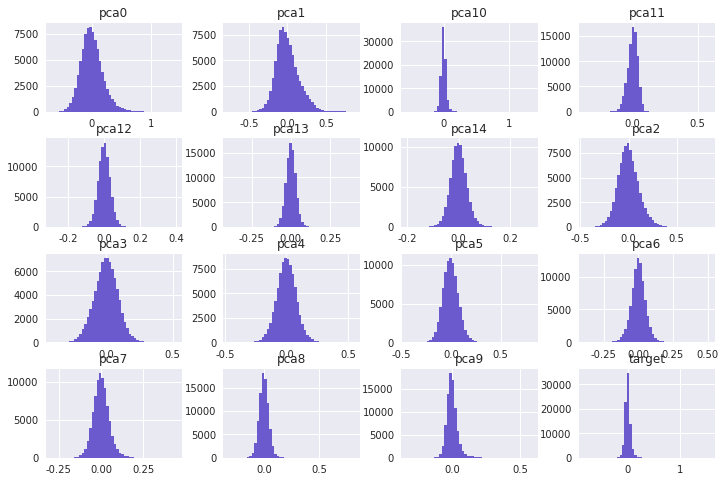

In [35]:
data_num_tr["target"] = data["target"].copy()
data_num_tr.hist(bins=50, figsize=(12,8), color='slateblue')
plt.show()

In [36]:
corr_matrix = data_num_tr.corr()
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
pca9      0.018719
pca12     0.015045
pca4      0.010270
pca3      0.009820
pca10     0.008682
pca11     0.005742
pca0      0.004169
pca8      0.003757
pca14     0.002783
pca1     -0.002908
pca6     -0.006216
pca2     -0.009822
pca13    -0.012312
pca7     -0.015068
pca5     -0.016623
Name: target, dtype: float64

### 2. 명목형 변수 전처리

In [37]:
data_cat = data[cat_attribute].copy()
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83564 entries, 0 to 83563
Data columns (total 1 columns):
F040    83383 non-null float64
dtypes: float64(1)
memory usage: 652.9 KB


#### 1.  결측치 처리

최빈값으로 처리

In [38]:
data_cat['F040'].value_counts()

2.0    17690
4.0    14687
1.0    12551
5.0    11282
7.0    10891
6.0     8904
3.0     7378
Name: F040, dtype: int64

In [0]:
data_cat['F040'] = data_cat['F040'].fillna(2)

#### 2. OneHot

In [0]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(categories='auto')

In [41]:
one_hot.fit_transform(data_cat).toarray().shape

(83564, 7)

### 3. 파이프라인 만들기
#### 1. train 데이터와 test 데이터 나누기

In [42]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data, test_size=0.2, random_state=42)

train_target = train["target"]
test_target = test["target"]

train.drop('target', axis=1, inplace=True)
test.drop('target', axis=1, inplace=True)

display(train.head())
display(train_target.head())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,F001,F002,F003,F004,F005,F006,F007,F008,F009,F010,...,F037,F038,F039,F040,F041,F042,F043,F044,F045,F046
55174,-5.537505,0.000000,6.524976,0.000000,-6.276151,0.003580,0.017899,-0.652707,0.171527,-0.007630,...,-1.321586,-0.007810,-0.022889,7.0,-0.031012,-4.395604,-21.219226,0.963250,-20.095125,-3.951822
16039,-7.640945,0.000000,1.432149,0.036692,-17.503155,0.021777,0.017173,-12.698492,0.763359,-0.026918,...,-21.431213,0.007037,-0.026153,1.0,-0.026153,-2.376600,-13.223731,0.979213,-25.839951,-7.389858
47843,-11.844201,0.000268,0.506265,0.139320,-8.818342,0.033945,0.036180,-7.575988,2.083333,-0.000961,...,-26.770538,0.002624,-0.002160,4.0,-0.005845,0.000000,-33.462033,1.054947,-37.860577,-3.331291
63771,7.292332,-0.001619,1.233991,0.121930,2.527076,0.031254,0.017167,4.571109,0.877193,0.000913,...,7.984791,0.011698,-0.000157,5.0,0.001068,2.631579,15.918367,0.919234,4.029304,1.314045
66187,8.676451,-0.014263,2.430123,0.049934,4.547284,0.081127,0.030583,5.399983,0.432900,0.002676,...,16.250280,-0.083794,0.020553,1.0,0.020553,6.666667,25.780683,0.926478,-11.777690,1.651524


55174    0.086310
16039   -0.021239
47843    0.052224
63771   -0.010563
66187    0.040352
Name: target, dtype: float64

#### 2. 수치형 변수 파이프라인

##### 1. 결측치 처리

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

In [0]:
class imputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean'):
        self.strategy=strategy
    def fit(self, X, y=None):
        self.imputer_tmp = SimpleImputer(strategy=self.strategy)
        self.imputer_tmp.fit(X)
        return self
    def transform(self, X, y=None):
        self.index = X.index
        X_tmp = pd.DataFrame(self.imputer_tmp.transform(X), columns=num_attribute,
                            index=self.index)
        return X_tmp

##### 2. min-max scaling, range=[0, 5]

In [0]:
class min_max(BaseEstimator, TransformerMixin):
    def __init__(self, feature_range=(0,1)):
        self.feature_range = feature_range
    def fit(self, X, y=None):
        self.max = X.max()
        self.min = X.min()
        return self
    def transform(self, X, y=None):
        tmp = ((X - self.min)/(self.max - self.min)) * (self.feature_range[1] - self.feature_range[0]) + self.feature_range[0]
        return tmp

##### 3. log화

In [0]:
class num_log(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_log1 = X[log_data1].copy()
        X_log2 = 5 - X[log_data2]
        
        for i in log_data1:
            X_log1.loc[:, i] = X_log1[i] - X_log1[i].min() + 0.01
        X_log1 = np.log(X_log1)
        
        for i in log_data2:
            X_log2.loc[:, i] = X_log2[i] - X_log2[i].min() + 0.01
        X_log2 = np.log(X_log2)
        
        log_data = log_data1 + log_data2
        
        X_with_log = X.drop(log_data, axis=1).join([X_log1, X_log2]).copy()
        return X_with_log

##### 4. PCA

In [0]:
class num_pca(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=15):
        self.n_components = n_components
    def fit(self, X, y=None):
        from sklearn.decomposition import PCA
        pca = PCA(n_components=self.n_components)
        pca.fit(X)
        return self
    
    def transform(self, X, y=None):
        self.index = X.index
        col = []
        for i in range(d):
            col.append('pca%s' %i)
        
        XdD = pd.DataFrame(pca.transform(X), index=self.index,
                                  columns=col)
        return XdD

##### 5. min-max scaling, range=[0, 1]
##### 6. standard scaling
#### 2. 명목형 변수 파이프라인
##### 1. 결측치

In [0]:
class cat_imputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['F040'] = X['F040'].fillna(2.)
        return X

##### 2. OneHot encoding
#### 3. 파이프라인 구축

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [0]:
num_pipeline = Pipeline([
    ('imputer', imputer()),
    ('minmax_range_0_5', min_max(feature_range=(0.,5.))),
    ('num_log', num_log()),
    ('num_pca', num_pca(n_components=d)),
    ('minmax_range_0_1', min_max(feature_range=(0.,1.))),
    ('StandardScaler', StandardScaler()) ])

In [0]:
cat_pipeline = Pipeline([
    ('cat_imputer', cat_imputer()),
    ('onehot', OneHotEncoder(categories='auto')),
])

In [0]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribute),
        ('cat', cat_pipeline, cat_attribute),
])

In [53]:
train_prepared = full_pipeline.fit_transform(train)
train_prepared.shape

(66851, 22)

## 4. 훈련과 모델 선택

In [0]:
from sklearn.metrics import mean_squared_error

In [55]:
train_target.describe()

count    66851.000000
mean         0.001247
std          0.056584
min         -0.601286
25%         -0.029140
50%         -0.001244
75%          0.028512
max          1.564103
Name: target, dtype: float64

### 1. 머신 러닝
#### 1. 선형회귀

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_target)

train_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_target, train_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_mse, lin_rmse)

0.0031934373117904614 0.056510506207168784


mse=0.002713  
rmse=0.052088  
우리의 타겟값의 분포의 분산이 0.056임을 고려할 때 좋은 성적이라고 생각되지 않는다.

#### 2. 결정트리-회귀

In [57]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=40)
tree_reg.fit(train_prepared, train_target)

train_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_target, train_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_mse, tree_rmse)

0.0010550682110539627 0.03248181354318078


결정트리의 경우, 선형회귀보다는 좋은 성적을 가지고 있지만 과대적합이 되어있을 가능성이 있으므로 교차검증을 통해 더 살펴봐야 한다.

#### 3. SVR

In [58]:
from sklearn.svm import SVR
svm_reg = SVR(kernel='poly',degree=1, gamma='auto', C=10)
svm_reg.fit(train_prepared, train_target)

train_predictions = svm_reg.predict(train_prepared)
svm_mse = mean_squared_error(train_target, train_predictions)
svm_rmse = np.sqrt(svm_mse)
print(svm_mse, svm_rmse)

0.0032735324325445874 0.05721479207813821


C를 여러번 변형해봤지만, SVR의 전반적인 성적은 선형회귀보다 떨어졌다.

#### 4. 랜덤포레스트-회귀

In [59]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=55, random_state=42, max_depth=40)
forest_reg.fit(train_prepared, train_target)

train_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_target, train_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_mse, forest_rmse)

0.0012525139113698585 0.03539087327786443


#### 5. LinReg + Ada

머신 러닝 알고리즘 중 선형 회귀를 Ada boosting을 통해 앙상블 작업을 하겠다.

In [60]:
from sklearn.ensemble import AdaBoostRegressor

Ada_lin_reg = AdaBoostRegressor(lin_reg, n_estimators = 20, random_state=0)
Ada_lin_reg.fit(train_prepared, train_target)

train_predictions = Ada_lin_reg.predict(train_prepared)
Ada_lin_mse = mean_squared_error(train_target, train_predictions)
Ada_lin_rmse = np.sqrt(Ada_lin_mse)
print(Ada_lin_mse, Ada_lin_rmse)

0.01059921518125568 0.10295248992256419


앙상블 결과가 나쁘게 나왔다.

### 2. 교차검증

In [0]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

#### 1. 선형회귀

In [62]:
scores = cross_val_score(lin_reg, train_prepared, train_target,
    scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [0.0565284  0.05695401 0.05745008 0.05518036]
Mean: 0.056528210821776996
Standard deviation: 0.0008437789768558816


#### 2. 결정트리-회귀

In [63]:
scores = cross_val_score(tree_reg, train_prepared, train_target,
    scoring="neg_mean_squared_error", cv=4)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [0.0737305  0.07078574 0.07639618 0.07420049]
Mean: 0.07377822720443782
Standard deviation: 0.001999327965795484


#### 3. SVR

In [64]:
scores = cross_val_score(svm_reg, train_prepared, train_target,
    scoring="neg_mean_squared_error", cv=4)
svm_rmse_scores = np.sqrt(-scores)
display_scores(svm_rmse_scores)

Scores: [0.05729189 0.05776672 0.05799675 0.05595154]
Mean: 0.05725172326057268
Standard deviation: 0.0007925230603787924


#### 4. 랜덤포레스트-회귀

In [65]:
scores = cross_val_score(forest_reg, train_prepared, train_target,
    scoring="neg_mean_squared_error", cv=4)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [0.05736839 0.05766691 0.05836423 0.05576555]
Mean: 0.057291268080690044
Standard deviation: 0.0009521179485338882


#### 5. Lin_reg + Ada

In [66]:
scores = cross_val_score(Ada_lin_reg, train_prepared, train_target,
    scoring="neg_mean_squared_error", cv=4)
Ada_lin_rmse_scores = np.sqrt(-scores)
display_scores(Ada_lin_rmse_scores)

Scores: [0.11180273 0.11349242 0.06405441 0.1167551 ]
Mean: 0.1015261638866935
Standard deviation: 0.021707438754752756


### 3. 딥러닝

딥러닝의 경우, 이미지나 시계열의 데이터가 아니므로 CNN이나 RNN보다는 DNN을 쓰는 것이 낫다고 판단했다.

1. 성능 평가 방법은 위에와 같이 rmse를 관찰한다.
2. 러닝 모델은 뉴런의 개수가 input에 2/3 씩 줄어드는 구조를 사용하겠다.
3. 러닝 알고리즘은 Adam을 쓰도록 하겠다.

In [67]:
X_train, X_valid = train_prepared[:50000], train_prepared[50000:]
y_train, y_valid = train_target[:50000], train_target[50000:]

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((50000, 22), (16851, 22), (50000,), (16851,))

In [0]:
reset_graph()

X = tf.placeholder("float", shape=(None, 22), name='X')
y = tf.placeholder("float", shape=(None), name='y')

In [0]:
n_hidden1 = 15
n_hidden2 = 10
n_hidden3 = 7
n_hidden4 = 5
n_hidden5 = 3
n_hidden6 = 2
n_outputs = 1

In [70]:
dropout_rate = 0.5
with tf.name_scope("dnn"):
    he_init = tf.variance_scaling_initializer()
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", 
                              kernel_initializer=he_init, activation=tf.nn.elu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", 
                              kernel_initializer=he_init, activation=tf.nn.elu)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name="hidden3", 
                              kernel_initializer=he_init, activation=tf.nn.elu)
    hidden3_drop = tf.layers.dropout(hidden3, dropout_rate)
    
    hidden4 = tf.layers.dense(hidden3_drop, n_hidden4, name="hidden4", 
                              kernel_initializer=he_init, activation=tf.nn.elu)
    hidden5 = tf.layers.dense(hidden4, n_hidden5, name="hidden5", 
                              kernel_initializer=he_init, activation=tf.nn.elu)
    hidden6 = tf.layers.dense(hidden5, n_hidden6, name="hidden6", 
                              kernel_initializer=he_init, activation=tf.nn.elu)
    hidden6_drop = tf.layers.dropout(hidden6, dropout_rate)
    
    outputs = tf.layers.dense(hidden6_drop, n_outputs, name='outputs', 
                              kernel_initializer=he_init)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dropout instead.


In [0]:
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.square(y - outputs))

In [72]:
learning_rate=0.0001

with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [0]:
with tf.name_scope("eval"):
    rmse = tf.sqrt(loss)

In [0]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y.iloc[batch_idx]
        yield X_batch, y_batch

In [78]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 1000
batch_size = 20000
batch_rmse = []
valid_rmse = []
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y:y_batch})
            
        
        rmse_batch = rmse.eval(feed_dict={X: X_batch, y:y_batch})
        rmse_valid = rmse.eval(feed_dict={X: X_valid, y:y_valid})
        batch_rmse.append(rmse_batch)
        valid_rmse.append(rmse_valid)
        if epoch % 10 == 0:
            print(epoch, "배치 데이터 rmse:", rmse_batch, "검증 세트 rmse:", rmse_valid)
        
    save_path = saver.save(sess, './miraeasset.ckpt')

0 배치 데이터 rmse: 0.06530639 검증 세트 rmse: 0.06328856
10 배치 데이터 rmse: 0.06357204 검증 세트 rmse: 0.06152604
20 배치 데이터 rmse: 0.061355844 검증 세트 rmse: 0.060156453
30 배치 데이터 rmse: 0.061421104 검증 세트 rmse: 0.05913723
40 배치 데이터 rmse: 0.060257617 검증 세트 rmse: 0.058400985
50 배치 데이터 rmse: 0.05966907 검증 세트 rmse: 0.057867106
60 배치 데이터 rmse: 0.059849564 검증 세트 rmse: 0.057470992
70 배치 데이터 rmse: 0.059326816 검증 세트 rmse: 0.05716756
80 배치 데이터 rmse: 0.05872436 검증 세트 rmse: 0.056926094
90 배치 데이터 rmse: 0.05792935 검증 세트 rmse: 0.056728516
100 배치 데이터 rmse: 0.058247875 검증 세트 rmse: 0.056563385
110 배치 데이터 rmse: 0.05785855 검증 세트 rmse: 0.05642266
120 배치 데이터 rmse: 0.05714575 검증 세트 rmse: 0.05630211
130 배치 데이터 rmse: 0.059075236 검증 세트 rmse: 0.056197632
140 배치 데이터 rmse: 0.05737405 검증 세트 rmse: 0.056107026
150 배치 데이터 rmse: 0.058829967 검증 세트 rmse: 0.056027103
160 배치 데이터 rmse: 0.057844356 검증 세트 rmse: 0.05595685
170 배치 데이터 rmse: 0.0584216 검증 세트 rmse: 0.055894725
180 배치 데이터 rmse: 0.058012504 검증 세트 rmse: 0.055839617
190 배치 데이터 rmse: 0.05

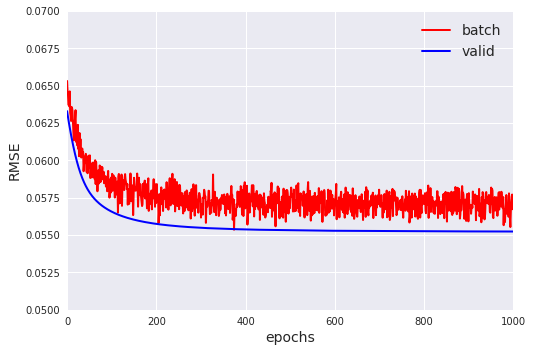

In [79]:
epochs = list(range(n_epochs))

plt.plot(epochs, batch_rmse,'r-+', linewidth=2, label='batch')
plt.plot(epochs, valid_rmse,'b-', linewidth=2, label='valid')
plt.legend(fontsize=14)
plt.xlabel('epochs', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.axis([0,n_epochs,0.05,0.06])
plt.show()

검증 결과는 DNN이 제일 잘 나오는 것 같다.

In [77]:
os.listdir()

['.config',
 'mirae.zip',
 'miraeasset.ckpt.index',
 'mirae',
 'checkpoint',
 'miraeasset.ckpt.meta',
 'miraeasset.ckpt.data-00000-of-00001',
 'sample_data']

In [0]:
from google.colab import files
files.download('miraeasset.ckpt.data-00000-of-00001') 
files.download('miraeasset.ckpt.index') 
files.download('miraeasset.ckpt.meta') 

### 4. 랜덤 그리드 탐색

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {'n_estimators': [10, 20, 30, 40, 50],
                "max_depth": [10, 20, 30, 40, 50],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["mse"]}

In [0]:
n_iter_search = 20
random_search = RandomizedSearchCV(forest_reg, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=4, random_state=0)
random_search.fit(train_prepared, train_target)

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=40,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [10, 20, 30, 40, 50], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdd59e5b208>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fdd59e5b898>, 'bootstrap': [True, False], 'criterion': ['mse']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [0]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

nan {'bootstrap': True, 'criterion': 'mse', 'max_depth': 10, 'max_features': 4, 'min_samples_split': 5, 'n_estimators': 20}
nan {'bootstrap': False, 'criterion': 'mse', 'max_depth': 30, 'max_features': 5, 'min_samples_split': 9, 'n_estimators': 10}
nan {'bootstrap': True, 'criterion': 'mse', 'max_depth': 50, 'max_features': 2, 'min_samples_split': 8, 'n_estimators': 10}
nan {'bootstrap': False, 'criterion': 'mse', 'max_depth': 20, 'max_features': 9, 'min_samples_split': 6, 'n_estimators': 40}
nan {'bootstrap': True, 'criterion': 'mse', 'max_depth': 40, 'max_features': 6, 'min_samples_split': 2, 'n_estimators': 30}
nan {'bootstrap': False, 'criterion': 'mse', 'max_depth': 10, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 40}
nan {'bootstrap': False, 'criterion': 'mse', 'max_depth': 10, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 30}
nan {'bootstrap': True, 'criterion': 'mse', 'max_depth': 40, 'max_features': 3, 'min_samples_split': 9, 'n_estimators': 50}
nan 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [0]:
forest_reg = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
forest_reg.fit(train_prepared, train_target)

train_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_target, train_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_mse, forest_rmse)

0.0030244640639816947 0.054995127638561715


In [0]:
param_dist = {'n_estimators': [35, 37, 40, 43, 45],
                "max_depth": [5, 7, 10, 13, 15],
              "max_features": [2],
              "min_samples_split": [5],
              "bootstrap": [True, False],
              "criterion": ["mse"]}

n_iter_search = 20
random_search = RandomizedSearchCV(forest_reg, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=4, random_state=0)
random_search.fit(train_prepared, train_target)

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'n_estimators': [35, 37, 40, 43, 45], 'max_depth': [5, 7, 10, 13, 15], 'max_features': [2], 'min_samples_split': [5], 'bootstrap': [True, False], 'criterion': ['mse']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [0]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=5,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=43, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=5,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=43, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [0]:
forest_reg = random_search.best_estimator_
forest_reg.fit(train_prepared, train_target)

train_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_target, train_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_mse, forest_rmse)

0.0031549316620701246 0.05616877835657568


In [0]:
param_dist = {'n_estimators': [40],
                "max_depth": [1,2,3,4,5,6,7,8,9],
              "max_features": [2],
              "min_samples_split": [5],
              "bootstrap": [True, False],
              "criterion": ["mse"]}

n_iter_search = 10
random_search = RandomizedSearchCV(forest_reg, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=4, random_state=0)
random_search.fit(train_prepared, train_target)
print(random_search.best_estimator_)

forest_reg = random_search.best_estimator_
forest_reg.fit(train_prepared, train_target)

train_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_target, train_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_mse, forest_rmse)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
0.0031874011916397244 0.056457073884852764


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

### 5. 테스트

In [81]:
test_prepared = full_pipeline.transform(test)

test_prepared.shape, test_target.shape

((16713, 22), (16713,))

#### 1. 선형 회귀

In [82]:
lin_reg_prediction_test = lin_reg.predict(test_prepared)
lin_mse = mean_squared_error(lin_reg_prediction_test, test_target)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.059041409456292215

#### 2. 랜덤 포레스트-1

In [83]:
forest_reg = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
forest_reg.fit(train_prepared, train_target)

forest_reg_prediction_test = forest_reg.predict(test_prepared)
forest_mse = mean_squared_error(forest_reg_prediction_test, test_target)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.059099617008751104

#### 2. 랜덤 포레스트-2

In [84]:
forest_reg = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=5,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=43, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
forest_reg.fit(train_prepared, train_target)

forest_reg_prediction_test = forest_reg.predict(test_prepared)
forest_mse = mean_squared_error(forest_reg_prediction_test, test_target)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.05907524049728258

#### 2. 랜덤 포레스트-3

In [85]:
forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)
forest_reg.fit(train_prepared, train_target)

forest_reg_prediction_test = forest_reg.predict(test_prepared)
forest_mse = mean_squared_error(forest_reg_prediction_test, test_target)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.059114157119934556

#### 3. DNN

In [86]:
with tf.Session() as sess:
    saver.restore(sess, './miraeasset.ckpt')
    print('test rmse %g' %sess.run(rmse, feed_dict={X: test_prepared, y: test_target}))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./miraeasset.ckpt
test rmse 0.0591295


## 5. 제출

최종 선택은 테스트 세트에서 강점을 보여준 선형 회귀로 하겠다.

In [0]:
submission_prepared = full_pipeline.transform(submission)
lin_reg_prediction_submission = lin_reg.predict(submission_prepared)

In [89]:
submission = SUBMISSION[['td','code']]
submission['target'] = lin_reg_prediction_submission
submission.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,td,code,target
0,T275,A005,0.003330
1,T275,A006,0.000419
2,T275,A007,0.004510
3,T275,A008,-0.000622
4,T275,A012,-0.002043


In [0]:
submission = submission.set_index(['td', 'code'])

In [95]:
display(submission.head())
submission.to_csv("final_predictions.csv", header=True, index=False)

target
td   code          
T275 A005  0.003330
     A006  0.000419
     A007  0.004510
     A008 -0.000622
     A012 -0.002043

In [96]:
os.listdir()

['.config',
 'mirae.zip',
 'miraeasset.ckpt.index',
 'mirae',
 'final_predictions.csv',
 'submission\\final_predictions.csv',
 'checkpoint',
 'miraeasset.ckpt.meta',
 'miraeasset.ckpt.data-00000-of-00001',
 'sample_data']

In [0]:
from google.colab import files
files.download('final_predictions.csv') 